In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
df = pd.read_csv("cleaned_data.csv")

In [3]:
df.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,house_size,house_type
0,Super built-up Area,19-Dec,Electronic City Phase II,coomee,1056.0,2,1,39.07,2,0
1,Plot Area,Ready To Move,Chikka Tirupathi,theanmp,2600.0,5,3,120.00,4,1
2,Built-up Area,Ready To Move,Uttarahalli,independent,1440.0,2,3,62.00,3,0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,soiewre,1521.0,3,1,95.00,3,0
4,Super built-up Area,Ready To Move,Kothanur,independent,1200.0,2,1,51.00,2,0


In [4]:
df.shape

(12808, 10)

# Univariate Analysis

## Society

In [5]:
df['society'].value_counts().shape

(2686,)

In [6]:
df['society'].value_counts()

independent    5335
grrvagr          69
prarepa          63
sryalan          56
prtates          54
               ... 
acisepa           1
madener           1
siilka            1
tepleee           1
rsntsap           1
Name: society, Length: 2686, dtype: int64

In [7]:
society_counts = df['society'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': 1,
 'High (50-100)': 6,
 'Average (10-49)': 131,
 'Low (2-9)': 1017,
 'Very Low (1)': 1531}

<Axes: >

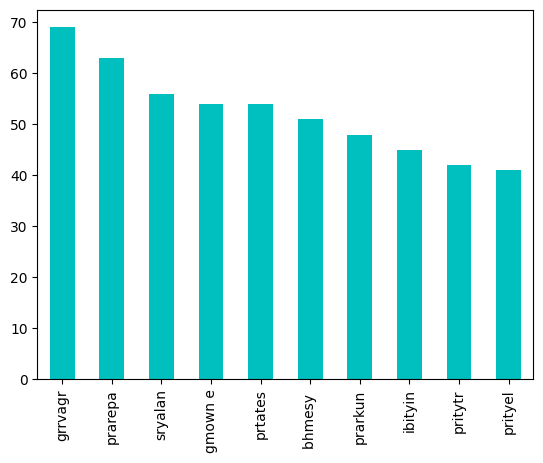

In [8]:
# Top 10 societies excluding independent type

df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar',color='c')

#### Observations

- Around 41.653654% properties comes under independent tag.
- There are 2686 societies. 
    - Very High (>100): Only independent type is more than 100.
    - High (50-100): 6 societies have between 50 to 100 listings.
    - Average (10-49): 131 societies fall in this range with 10 to 49 listings each.
    - Low (2-9): 1017 societies have between 2 to 9 listings.
    - Very Low (1): A significant number, 1531 societies, have only 1 listing.


## Location

<Axes: >

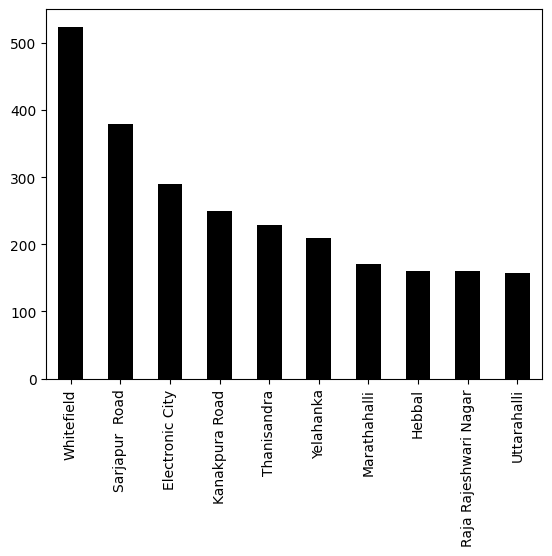

In [9]:
# top 10 locations

df['location'].value_counts().head(10).plot(kind='bar',color='k')

In [10]:
df['location'].nunique()

1305

In [11]:
location_counts = df['location'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (location_counts > 100).sum(),
    "High (50-100)": ((location_counts >= 50) & (location_counts <= 100)).sum(),
    "Average (10-49)": ((location_counts >= 10) & (location_counts < 50)).sum(),
    "Low (2-9)": ((location_counts > 1) & (location_counts < 10)).sum(),
    "Very Low (1)": (location_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': 16,
 'High (50-100)': 29,
 'Average (10-49)': 204,
 'Low (2-9)': 576,
 'Very Low (1)': 480}

#### Observations

- There are a total of 1305 unique locations in the dataset.
- Frequency distribution of locations:
    - Very High (>100): 16 locations have more than 100 listings.
    - High (50-100): 29 locations have between 50 to 100 listings.
    - Average (10-49): 204 locations, fall in this range with 10 to 49 listings each.
    - Low (2-9): 576 sectors have between 2 to 9 listings.
    - Very Low (1): 480 locations have only 1 listing.

## Price

In [12]:
df['price'].describe()

count    12808.000000
mean       117.456241
std        402.072028
min          8.000000
25%         50.000000
50%         73.000000
75%        121.000000
max      42278.000000
Name: price, dtype: float64

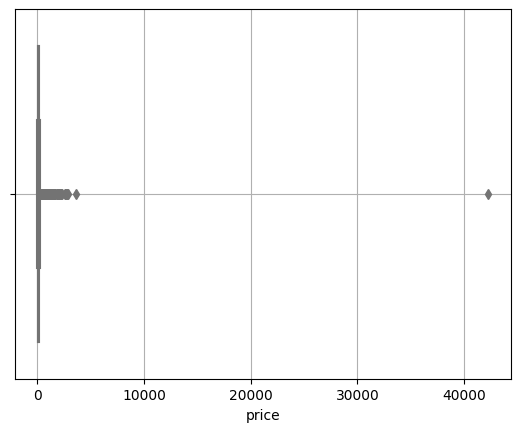

In [13]:
sns.boxplot(x=df['price'], color='lightgreen')
plt.grid()

###### outliers - There are some extreme outliers in the data.
-- Remove extreme outliers

In [14]:
df.shape

(12808, 10)

In [15]:
# Calculate the IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [16]:
print(lower_bound)
print(upper_bound)

-56.5
227.5


According to IQR, upper bound is 227.5, set bar 500 to prevent excess data loss.

In [17]:
df = df[df['price'] <= 500]
df.shape

(12567, 10)

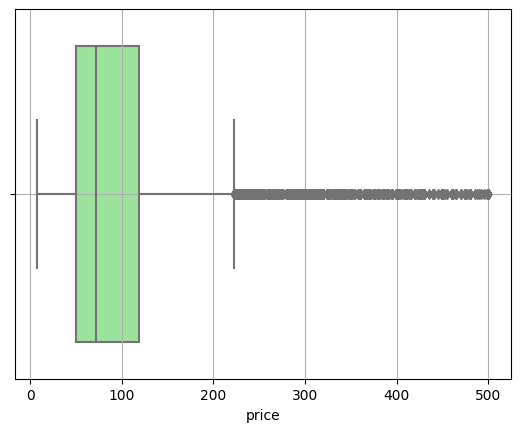

In [18]:
sns.boxplot(x=df['price'], color='lightgreen')
plt.grid()

In [19]:
df['price'].describe()

count    12567.000000
mean        99.383228
std         80.465784
min          8.000000
25%         50.000000
50%         71.640000
75%        119.000000
max        500.000000
Name: price, dtype: float64

 The interquartile range (difference between 75th and 25th percentile) is from 50 dollars to 119 dollars.


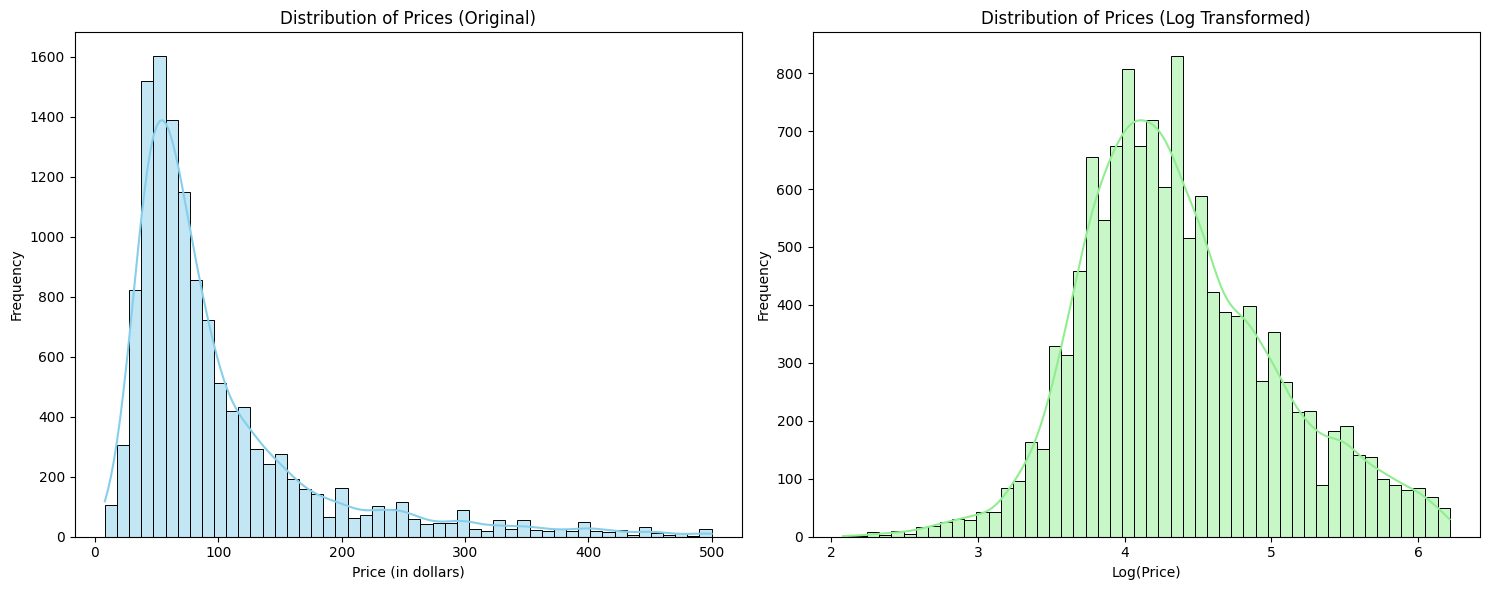

In [20]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in dollars)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [21]:
# Skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

2.2154234950177276 5.425014795675321


A **skewness** value of 2.215 and a **kurtosis** value of 5.425 suggest that the data distribution is highly skewed and has heavy tails compared to a normal distribution.

#### Conclusion
- price column might need log transformation. As it seems that the data is Highly right-skewed (positive skewness) and has a leptokurtic distribution, where extreme values are more frequent than in a normal distribution.

## Balcony

<Axes: ylabel='balcony'>

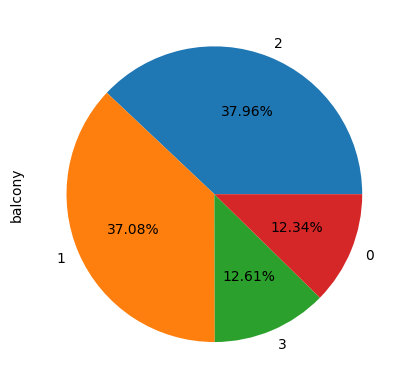

In [22]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

## Bath

<Axes: >

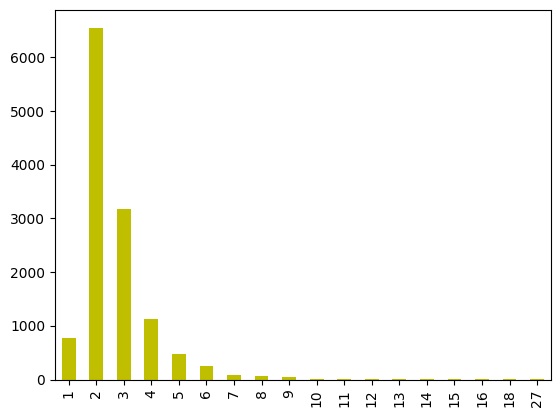

In [23]:
df['bath'].value_counts().sort_index().plot(kind='bar',color='y')

<Axes: ylabel='bath'>

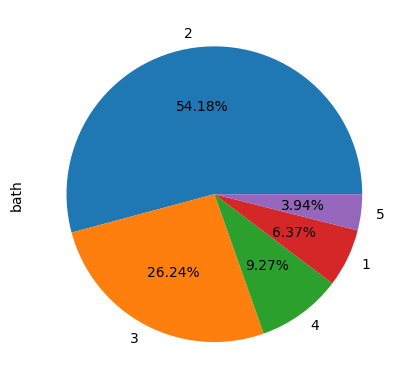

In [24]:
df['bath'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

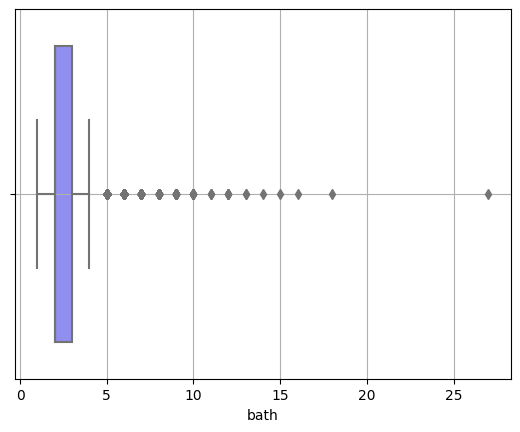

In [25]:
sns.boxplot(x=df['bath'], palette='cool')
plt.grid()

#### There are some outliers

In [26]:
df['bath'].value_counts()

2     6556
3     3175
4     1122
1      771
5      477
6      246
7       93
8       60
9       40
10      12
12       5
11       3
13       2
27       1
14       1
16       1
15       1
18       1
Name: bath, dtype: int64

In [27]:
df=df[df['bath']<=9]
df.shape

(12540, 10)

### Observation

- 54% of data have 2 bathrooms
- There are 575 outlier count in bath column

**approach  --**
 Removing only those having more than 9 bathrooms for easier analysis.


<Axes: >

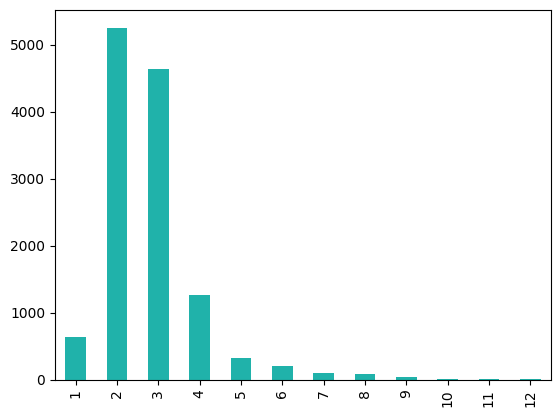

In [28]:
df['house_size'].value_counts().sort_index().plot(kind='bar',color="#20B2AA")

<Axes: ylabel='house_size'>

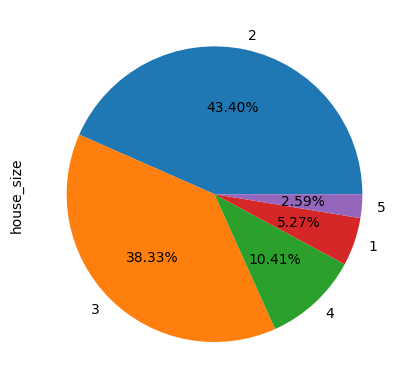

In [29]:
df['house_size'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

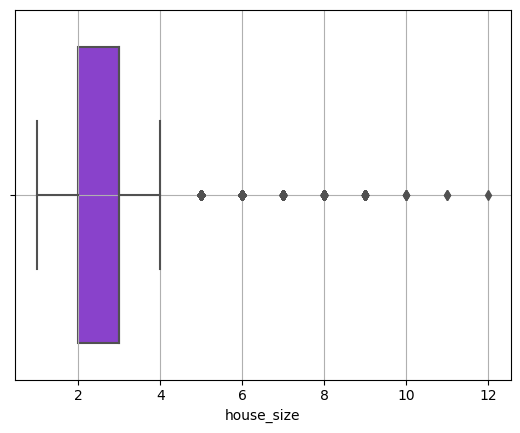

In [30]:
sns.boxplot(x=df['house_size'], color='#8A2BE2')
plt.grid()

In [31]:
df['house_size'].value_counts()

2     5255
3     4641
4     1261
1      638
5      314
6      208
7       92
8       80
9       44
10       4
11       2
12       1
Name: house_size, dtype: int64

In [32]:
df= df[df['house_size']<=9]
df.shape

(12533, 10)

### Observation

- Almost 43% of data have 2 BHK
- 38% have 3 BHK
- There are 539 outlier count in house_size column


## total_sqft

In [33]:
# Set display options to suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x) 
df['total_sqft'] = df['total_sqft'].apply(lambda x: round(x, 2))

In [34]:
df['total_sqft'].describe()

count     12533.00
mean       1875.18
std       17798.17
min           1.00
25%        1100.00
50%        1270.00
75%        1655.00
max     1306800.00
Name: total_sqft, dtype: float64

In [35]:
# Removing Only Extreme Outliers for easier analysis
df = df[df['total_sqft']<= 10000]

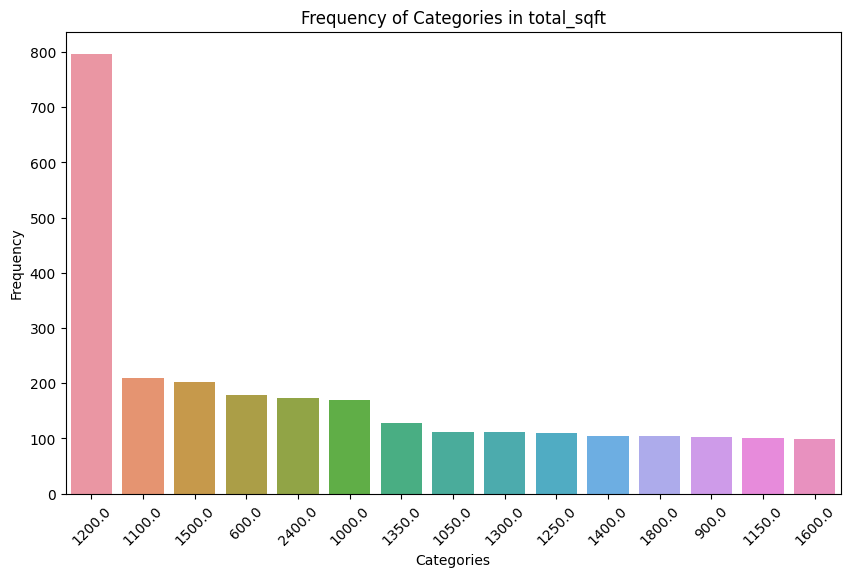

In [36]:
value_counts = df['total_sqft'].value_counts().head(15)
plt.figure(figsize=(10, 6))
sns.countplot(x='total_sqft', data=df, order=value_counts.index)
plt.title('Frequency of Categories in ' + 'total_sqft')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  
plt.show()

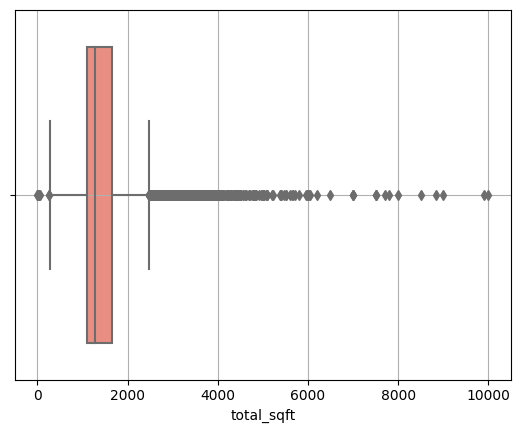

In [37]:
sns.boxplot(x=df['total_sqft'], color='salmon')
plt.grid()

## Area_type

In [38]:
df['area_type'].value_counts()

Super built-up  Area    8237
Built-up  Area          2368
Plot  Area              1814
Carpet  Area              87
Name: area_type, dtype: int64

<Axes: ylabel='area_type'>

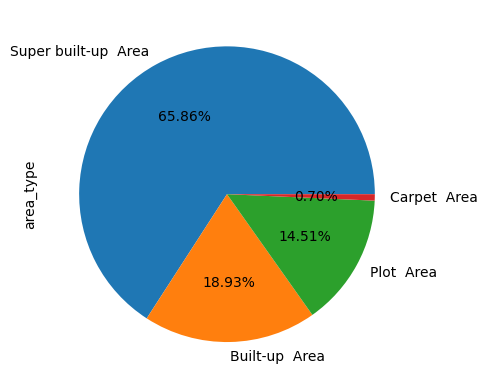

In [39]:
df['area_type'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

## Availability

In [40]:
df['availability'].value_counts()

Ready To Move    9951
18-May            286
18-Dec            283
18-Apr            261
18-Aug            187
                 ... 
16-Oct              1
15-Dec              1
15-Jun              1
16-Jul              1
14-Jul              1
Name: availability, Length: 80, dtype: int64

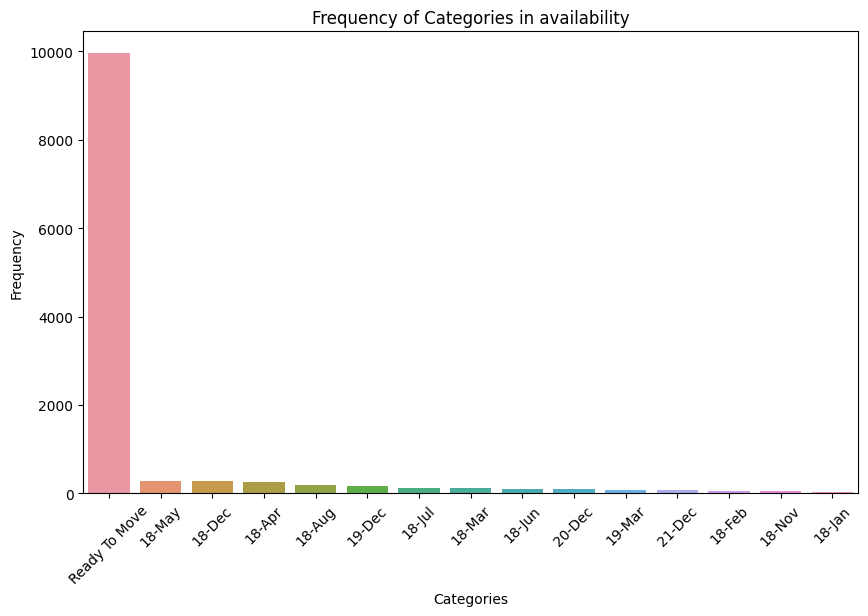

In [41]:
value_counts = df['availability'].value_counts().head(15)
plt.figure(figsize=(10, 6))
sns.countplot(x='availability', data=df, order=value_counts.index)
plt.title('Frequency of Categories in ' + 'availability')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#### Conclusion
- Around 74% of the data is Ready To Move
- The remaining Houses are mostly availaible in 3rd week of every month.

In [42]:
df.shape

(12506, 10)

In [43]:
categorical_columns = ['area_type', 'availability', 'location', 'society']
numerical_columns = ['price','bath', 'balcony','total_sqft', 'house_size','house_type']

# Bivariate analysis

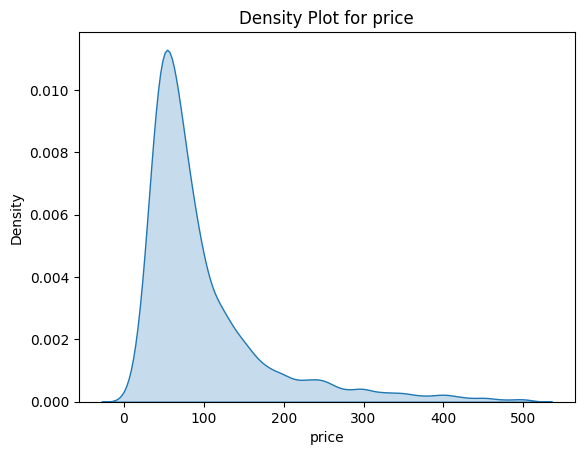

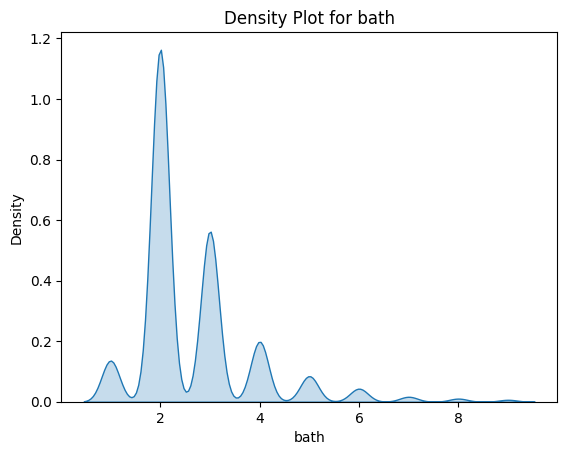

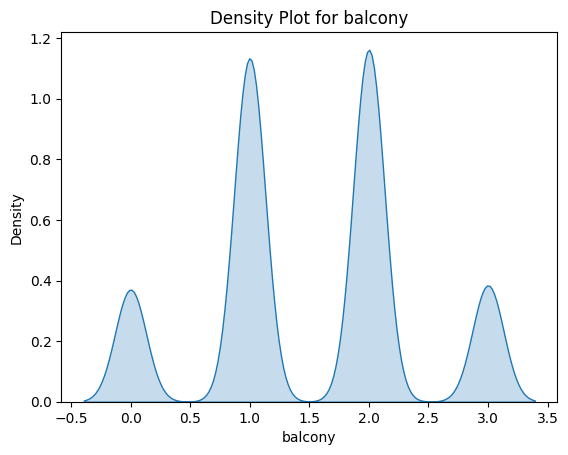

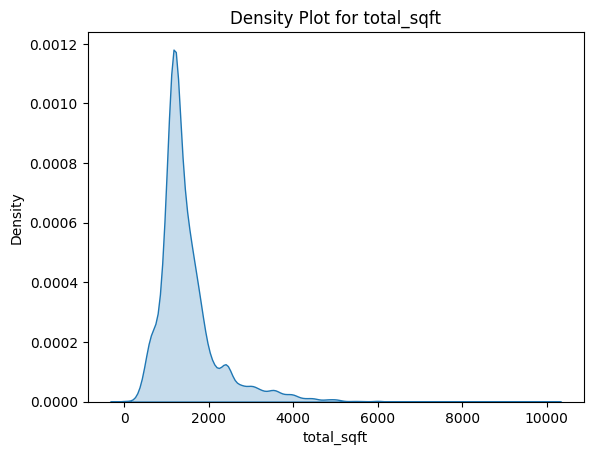

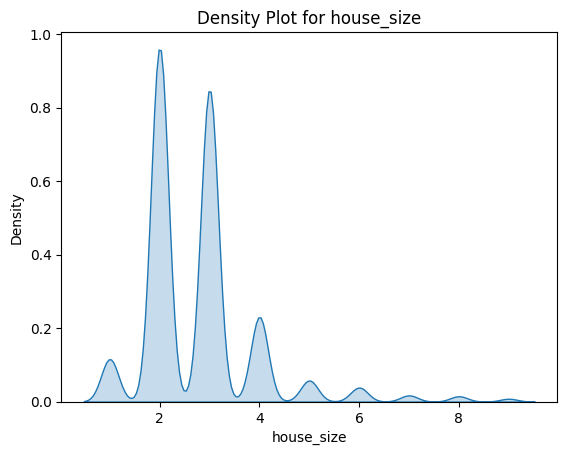

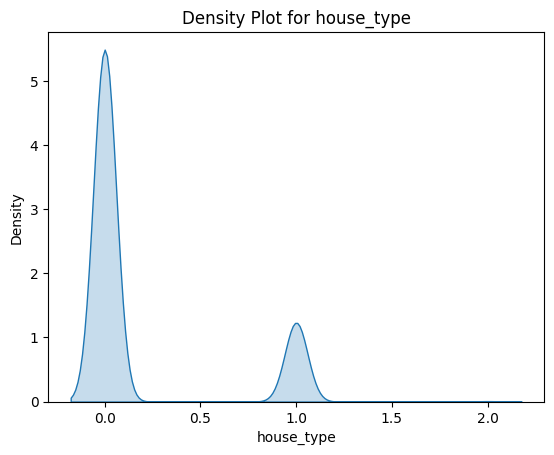

In [44]:
def create_density_plot(data, columns):
    for col in columns:
        sns.kdeplot(data[col], shade=True)
        plt.title('Density Plot for ' + col)
        plt.ticklabel_format(style='plain', axis='x')  # Set x-axis tick labels to plain notation
        plt.xlabel(col)  # Set x-axis label to the column name
        plt.ylabel('Density')  # Set y-axis label
        plt.show()
create_density_plot(df, numerical_columns)

# Multivariate Analysis

In [45]:
# Heatmap for numerical columns
def create_heatmap(data, columns):
    plt.figure(figsize=(6,4))
    sns.heatmap(data[columns].corr(), annot=True, fmt=".1f", cmap='RdYlGn')
    plt.title('Heatmap for Columns')
    plt.show()

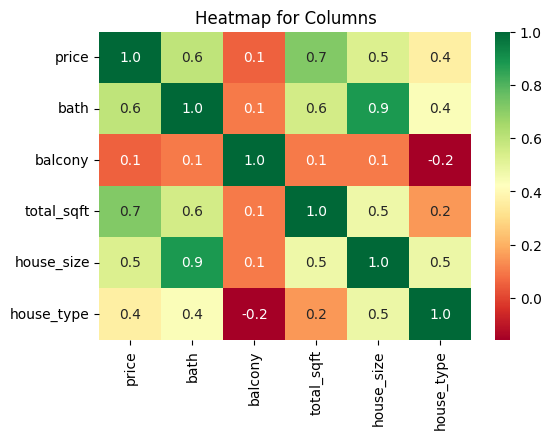

In [46]:
create_heatmap(df, numerical_columns)

# Overall Observation*
- 'price' , 'bath' , 'house_size' , 'total_sqft'  --  These columns contains outliers.



In [47]:
df.to_csv('cleaned_data.csv', index=False)

In [48]:
df.shape

(12506, 10)